Marcella Komunita Pasaribu <br>
https://www.kaggle.com/yufengdev/bbc-fulltext-and-category/code

In [3]:
import pandas as pd
import tensorflow as tf

In [4]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", 
             "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", 
             "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", 
             "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", 
             "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", 
             "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", 
             "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", 
             "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", 
             "yourselves" ]

def rm_stop_words(str):
  final_text = []
  for i in str.split():
      if i.strip().lower() not in stopwords:
        final_text.append(i.strip())
  return ' '.join(final_text)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df = pd.read_csv('/content/drive/My Drive/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [19]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru['text'] = df_baru['text'].apply(rm_stop_words)
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future hands viewers home theatre systems p...,0,0,0,0,1
1,worldcom boss left books alone former worldcom...,1,0,0,0,0
2,tigers wary farrell gamble leicester say will ...,0,0,0,1,0
3,yeading face newcastle fa cup premiership side...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull us retail figures us retail sales fe...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem a...,0,1,0,0,0
2223,political squabbles snowball s become commonpl...,0,0,1,0,0


In [20]:
teks = df_baru['text']
label = df_baru[['business', 'entertainment', 'politics',	'sport',	'tech']].values

In [21]:
from sklearn.model_selection import train_test_split
teks_latih, teks_test, label_latih, label_test = train_test_split(teks, label, test_size=0.2, shuffle=True)

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(teks_latih)
 
sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)
 
padded_latih = pad_sequences(sekuens_latih, maxlen=120) 
padded_test = pad_sequences(sekuens_test, maxlen=120)

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      self.model.stop_training = True
      print("\nAkurasi > 92%")
callbacks = myCallback()

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64, input_length=120),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
hist = model.fit(padded_latih, label_latih, epochs=30, 
                    validation_data=(padded_test, label_test), 
                    verbose=2, 
                    callbacks=[callbacks])

Epoch 1/30
56/56 - 8s - loss: 1.5945 - accuracy: 0.2522 - val_loss: 1.5341 - val_accuracy: 0.3169
Epoch 2/30
56/56 - 6s - loss: 1.1925 - accuracy: 0.5281 - val_loss: 0.7975 - val_accuracy: 0.7213
Epoch 3/30
56/56 - 6s - loss: 0.5995 - accuracy: 0.7966 - val_loss: 0.5959 - val_accuracy: 0.7865
Epoch 4/30
56/56 - 6s - loss: 0.3165 - accuracy: 0.9242 - val_loss: 0.3766 - val_accuracy: 0.8876
Epoch 5/30
56/56 - 6s - loss: 0.2065 - accuracy: 0.9461 - val_loss: 0.3274 - val_accuracy: 0.8809
Epoch 6/30
56/56 - 6s - loss: 0.0641 - accuracy: 0.9860 - val_loss: 0.2508 - val_accuracy: 0.9236

Akurasi > 92%


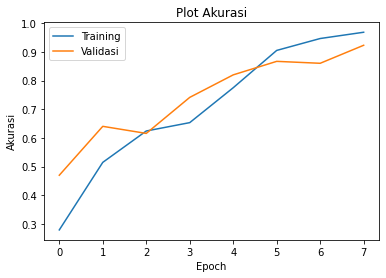

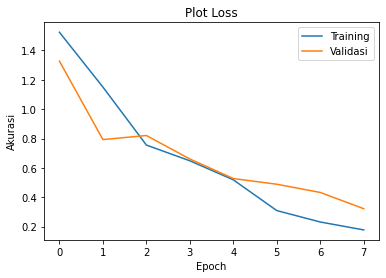

In [16]:
import matplotlib.pyplot as plt

#plot akurasi
plt.plot(hist.history['accuracy'], label='Training')
plt.plot(hist.history['val_accuracy'], label='Validasi')

plt.title('Plot Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()

plt.show()

#plot loss
plt.plot(hist.history['loss'], label='Training')
plt.plot(hist.history['val_loss'], label='Validasi')

plt.title('Plot Loss')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()

plt.show()